# Morgan Data


******
Index of Plots

******

01. Initial plot of tide height across 9 years- Pre analysis, Initial Visualization
02. 9 year time period is divided into individual years, and plotted again -Pre analysis and Visualization, before removing extreme values
03. Boxplot of each year 
04. Voilin plot of each year

`Extreme values are removed. In most cases they are less in number (per year), so overall integrity of data remains unaffected.`
`If extreme values across the whole dataset is looked at, they are probably large in number`

05. **Box plot** of tide height across individual years, *with extremeties removed*. Boxplots now become more defined
06. **Voilin plot** of tide height across individual years, *with extremeties removed*.Plots now become more defined
07. **Bar plot** of average tide height for each year
08. **Tide height frequency analysis plots for a 25 day cycle**

` I selected a cycle of 25 days, instead of 'per month'`and used that division for the rest of the plots.

09. **Auto-correlation** for 9 year time period, *25 day cycle*
10. **Partial Autocrorelation** for 9 year time period, *25 day cycle*
11. **Auto-correlation** for 9 year time period, *divided by years, extremeties removed*
12. **Partial auto-correlation** for 9 year time period, *divided by years, extremeties removed*
13. **Periodogram** of every year, *data has extremeties removed*

14. **Inferential analysis** on Data volatality

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv("https://tamucc-ir.tdl.org/bitstream/handle/1969.6/87797/MorgansPoint_RawDataOnly.csv?sequence=1&isAllowed=y")


In [249]:
df = df.rename(columns={'#date+time': 'DateWTime', '503-pwl': 'TideHeight'})
df =df.set_index('DateWTime')
df

,TideHeight
DateWTime,
1992-05-20T02:00:00Z,2.035
1992-05-20T02:06:00Z,2.024
1992-05-20T02:12:00Z,2.019
1992-05-20T02:18:00Z,2.029
1992-05-20T02:24:00Z,2.007
...,...
2019-12-31T23:30:00Z,1.439
2019-12-31T23:36:00Z,1.445
2019-12-31T23:42:00Z,1.429


In [250]:

#drop first 1548381 rows
df = df.drop(df.index[:1549180])
df

,TideHeight
DateWTime,
2010-01-21T00:00:00Z,1.816
2010-01-21T00:06:00Z,1.822
2010-01-21T00:12:00Z,1.825
2010-01-21T00:18:00Z,1.829
2010-01-21T00:24:00Z,1.833
...,...
2019-12-31T23:30:00Z,1.439
2019-12-31T23:36:00Z,1.445
2019-12-31T23:42:00Z,1.429


In [251]:
df['TideHeight'].isnull().sum() #count missing values

37462

In [252]:
#interpolate missing values
df = df.interpolate(method='linear')
df


,TideHeight
DateWTime,
2010-01-21T00:00:00Z,1.816
2010-01-21T00:06:00Z,1.822
2010-01-21T00:12:00Z,1.825
2010-01-21T00:18:00Z,1.829
2010-01-21T00:24:00Z,1.833
...,...
2019-12-31T23:30:00Z,1.439
2019-12-31T23:36:00Z,1.445
2019-12-31T23:42:00Z,1.429


In [253]:
df['Date'] = df.index.str.slice(0,10)
df['Time'] = df.index.str.slice(11,16)
df

,TideHeight,Date,Time
DateWTime,,,
2010-01-21T00:00:00Z,1.816,2010-01-21,00:00
2010-01-21T00:06:00Z,1.822,2010-01-21,00:06
2010-01-21T00:12:00Z,1.825,2010-01-21,00:12
2010-01-21T00:18:00Z,1.829,2010-01-21,00:18
2010-01-21T00:24:00Z,1.833,2010-01-21,00:24
...,...,...,...
2019-12-31T23:30:00Z,1.439,2019-12-31,23:30
2019-12-31T23:36:00Z,1.445,2019-12-31,23:36
2019-12-31T23:42:00Z,1.429,2019-12-31,23:42


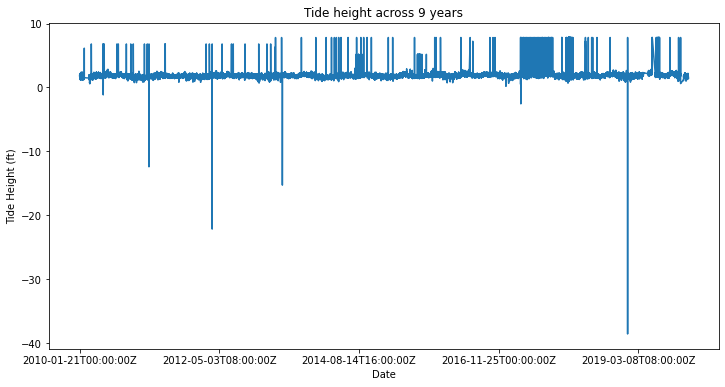

In [254]:
#plot tide height
df['TideHeight'].plot(figsize=(12,6))
plt.title('Tide height across 9 years')
plt.xlabel('Date')
plt.ylabel('Tide Height (ft)')
#save plot

plt.savefig('Morgan/MorganTideHeightAcross9years.png', facecolor='w')
plt.show()

In [255]:
df1=df.iloc[0:82800,:]
df2=df.iloc[82800:170400,:]
df3=df.iloc[170400:258240,:]
df4=df.iloc[258240:345840,:]
df5=df.iloc[345840:433440,:]
df6=df.iloc[433440:521040,:]
df7=df.iloc[521040:608880,:]
df8=df.iloc[608880:696480,:]
df9=df.iloc[696480:784080,:]
df10=df.iloc[784080:871681,:]

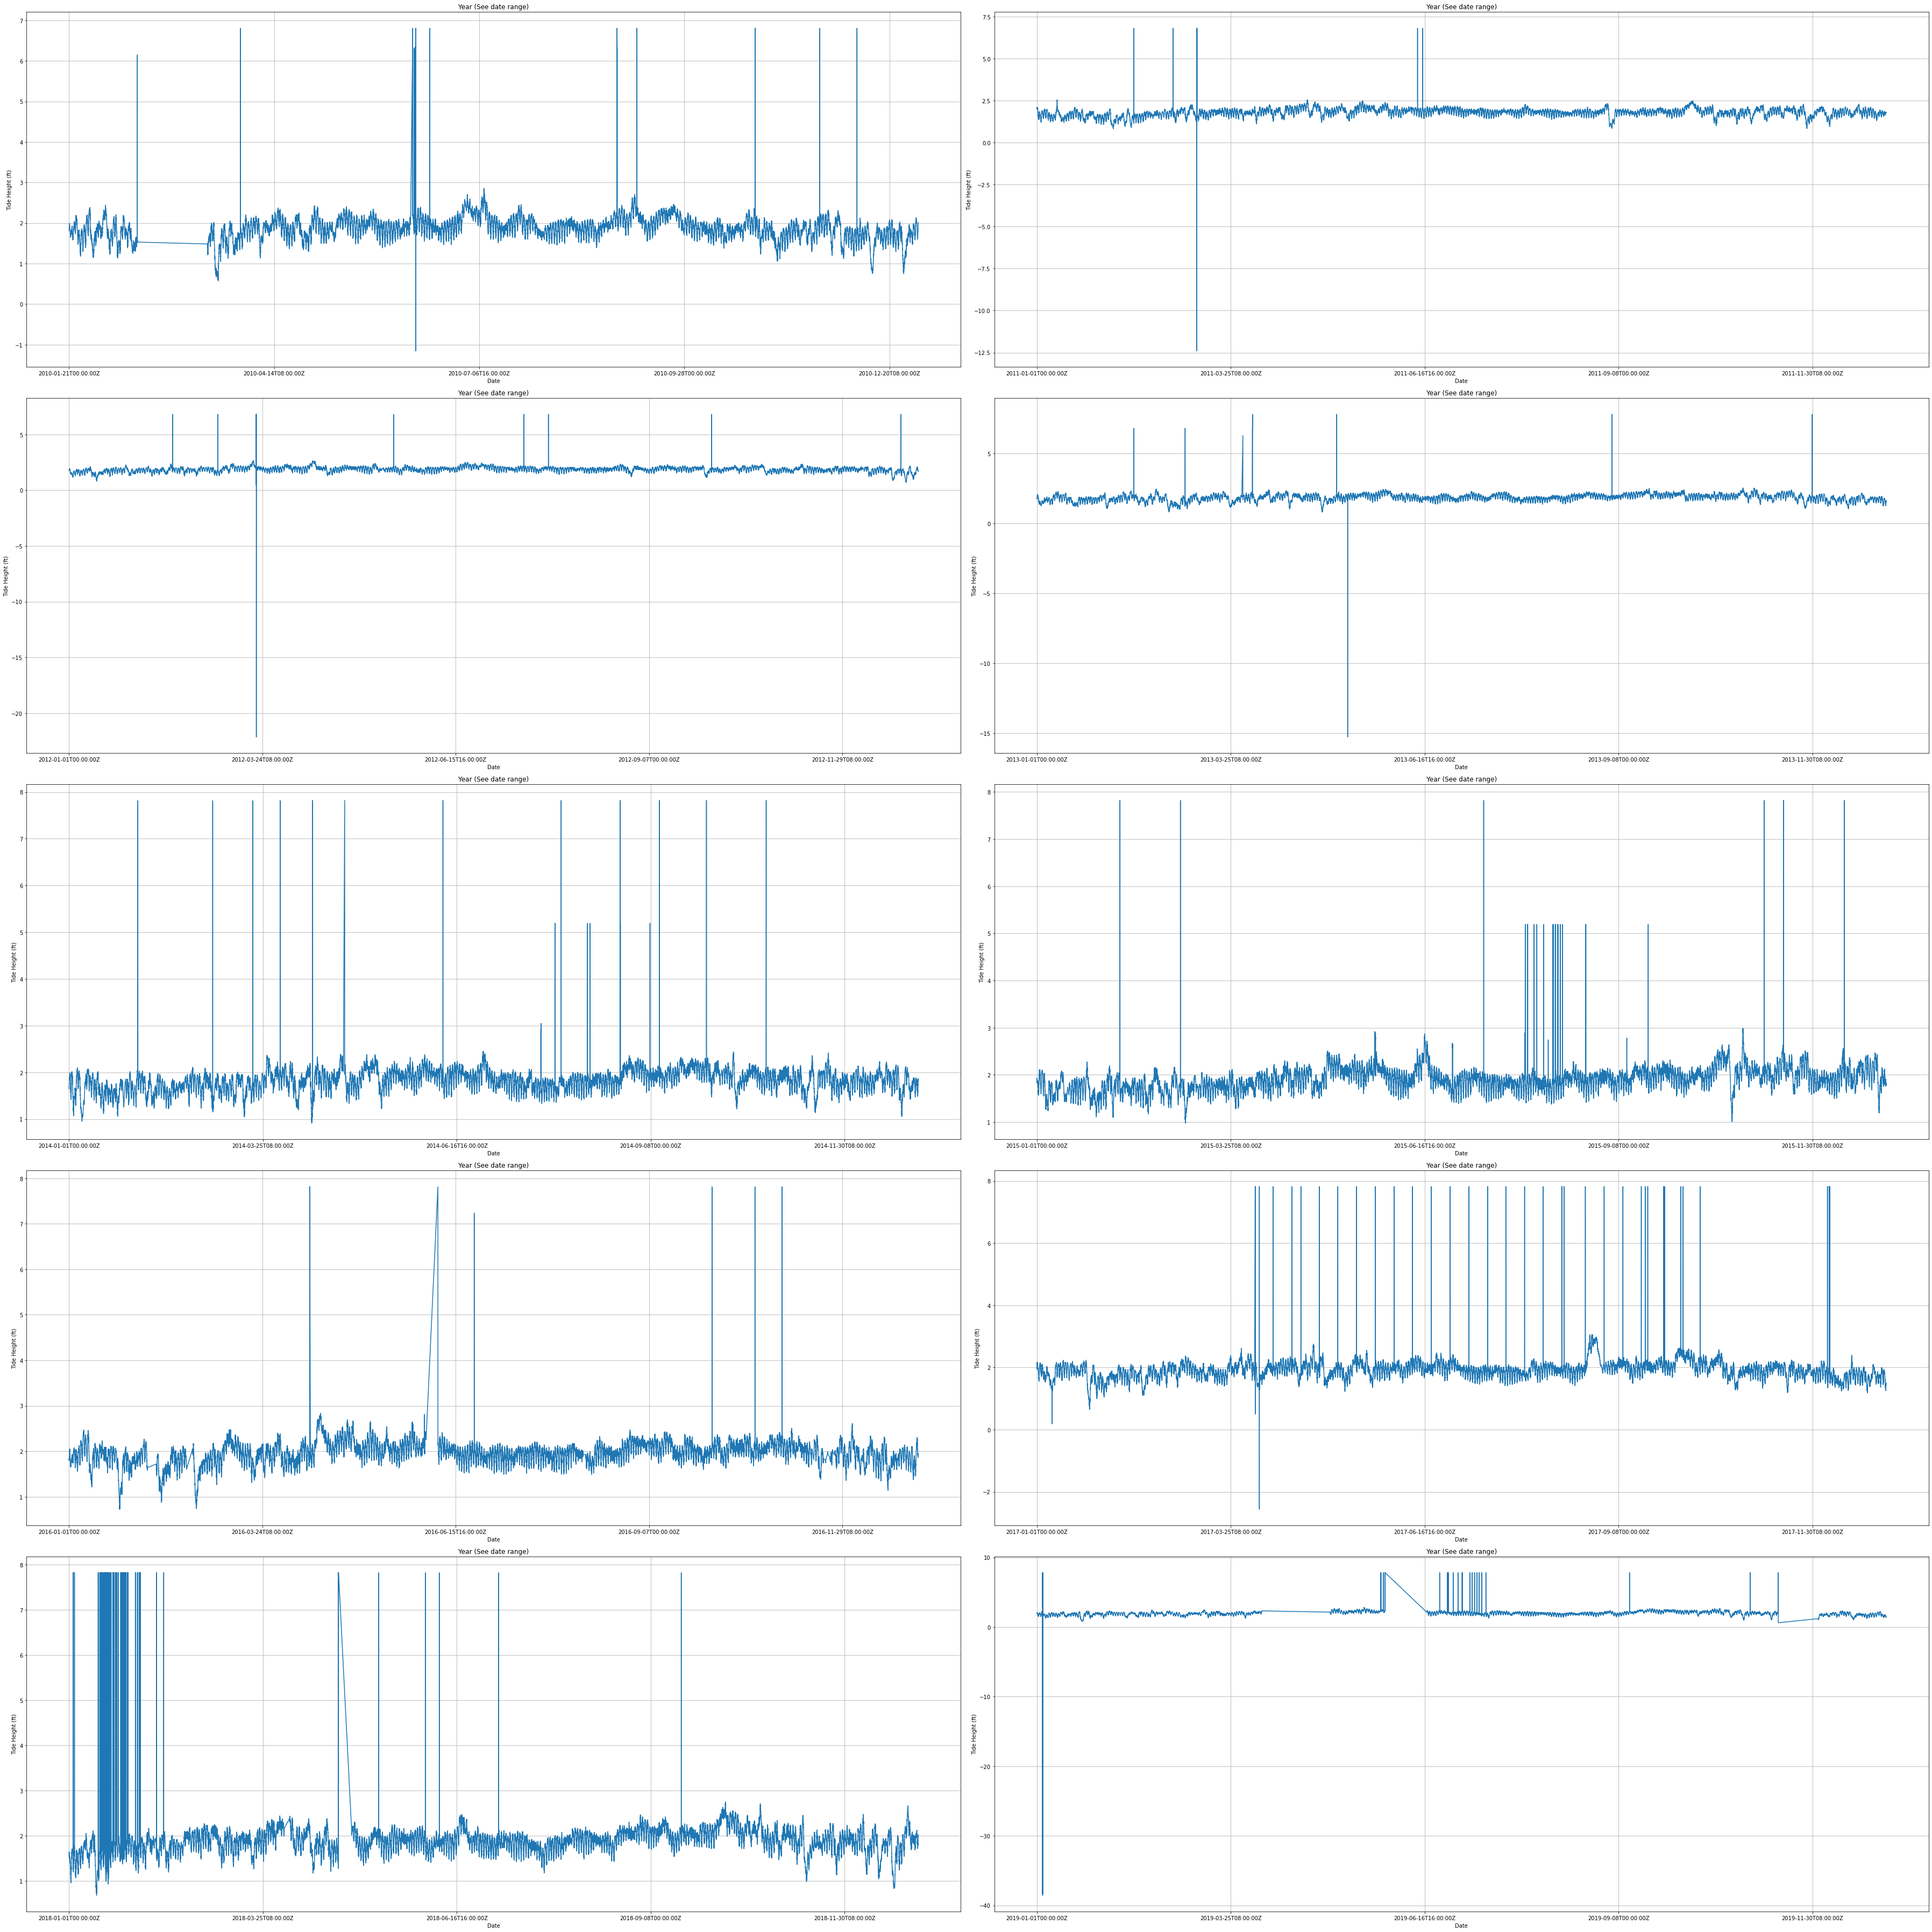

In [256]:
import warnings     
warnings.filterwarnings('ignore')

fig, axs = plt.subplots(5,2, figsize=(50,50))
#give whole plot a title


#write function to  plot tide height
def plot_tide_height(df, ax):
    df['TideHeight'].plot(ax=ax)
    ax.set_title('Year (See date range)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Tide Height (ft)')
    return ax

#for loop
for i in range(5):
    for j in range(2):
        ax = axs[i,j]
        if i == 0 and j == 0:
            plot_tide_height(df1, ax)
        elif i == 0 and j == 1:
            plot_tide_height(df2, ax)
        elif i == 1 and j == 0:
            plot_tide_height(df3, ax)
        elif i == 1 and j == 1:
            plot_tide_height(df4, ax)
        elif i == 2 and j == 0:
            plot_tide_height(df5, ax)
        elif i == 2 and j == 1:
            plot_tide_height(df6, ax)
        elif i == 3 and j == 0:
            plot_tide_height(df7, ax)
        elif i == 3 and j == 1:
            plot_tide_height(df8, ax)
        elif i == 4 and j == 0:
            plot_tide_height(df9, ax)
        elif i == 4 and j == 1:
            plot_tide_height(df10, ax)

#insert grid lines
for ax in axs.flat:
    ax.grid(True)
    
plt.tight_layout()

plt.savefig('Morgan/MorgantideHeightEveryYear.png', facecolor = 'w')

plt.show()


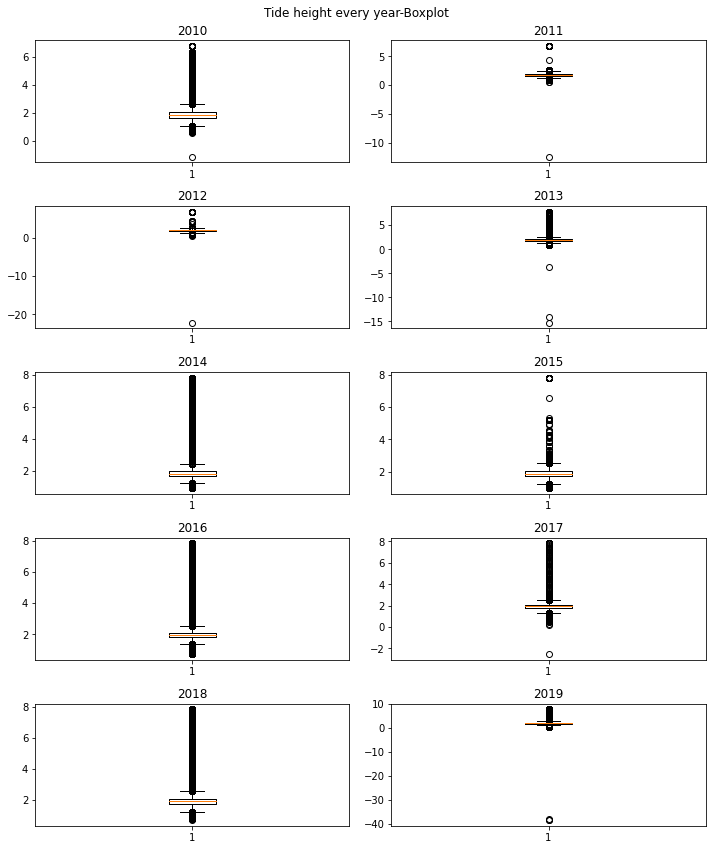

In [257]:
import seaborn as sns

fig, axs = plt.subplots(5,2, figsize=(10,12))
fig.suptitle('Tide height every year-Boxplot')

axs[0,0].boxplot(df1['TideHeight'])
axs[0,0].set_title('2010')

axs[0,1].boxplot(df2['TideHeight'])
axs[0,1].set_title('2011')

axs[1,0].boxplot(df3['TideHeight'])
axs[1,0].set_title('2012')

axs[1,1].boxplot(df4['TideHeight'])
axs[1,1].set_title('2013')

axs[2,0].boxplot(df5['TideHeight'])
axs[2,0].set_title('2014')

axs[2,1].boxplot(df6['TideHeight'])
axs[2,1].set_title('2015')

axs[3,0].boxplot(df7['TideHeight'])
axs[3,0].set_title('2016')

axs[3,1].boxplot(df8['TideHeight'])
axs[3,1].set_title('2017')

axs[4,0].boxplot(df9['TideHeight'])
axs[4,0].set_title('2018')

axs[4,1].boxplot(df10['TideHeight'])
axs[4,1].set_title('2019')

plt.tight_layout()
plt.savefig('Morgan/MorganInitialBoxplots.png', facecolor='w', edgecolor='w')
plt.show()

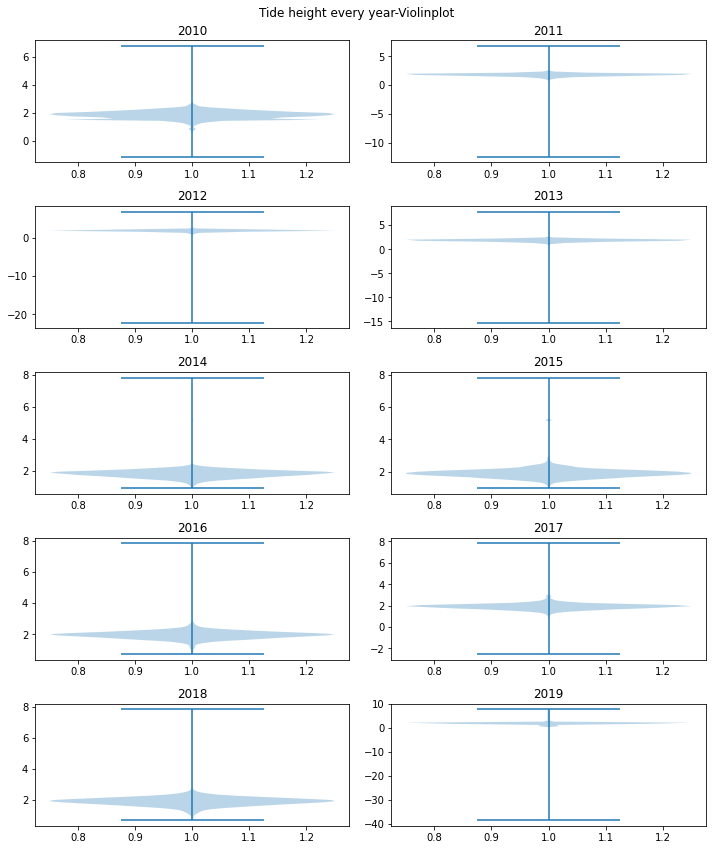

In [258]:
fig, axs = plt.subplots(5,2, figsize=(10,12))
fig.suptitle('Tide height every year-Violinplot')

axs[0,0].violinplot(df1['TideHeight'])
axs[0,0].set_title('2010')

axs[0,1].violinplot(df2['TideHeight'])
axs[0,1].set_title('2011')

axs[1,0].violinplot(df3['TideHeight'])
axs[1,0].set_title('2012')

axs[1,1].violinplot(df4['TideHeight'])
axs[1,1].set_title('2013')

axs[2,0].violinplot(df5['TideHeight'])
axs[2,0].set_title('2014')

axs[2,1].violinplot(df6['TideHeight'])
axs[2,1].set_title('2015')

axs[3,0].violinplot(df7['TideHeight'])
axs[3,0].set_title('2016')

axs[3,1].violinplot(df8['TideHeight'])
axs[3,1].set_title('2017')

axs[4,0].violinplot(df9['TideHeight'])
axs[4,0].set_title('2018')

axs[4,1].violinplot(df10['TideHeight'])
axs[4,1].set_title('2019')

plt.tight_layout()
plt.savefig('Morgan/MorganInitialVoilinPlots.png', facecolor='w', edgecolor='w')
plt.show()

In [259]:
#drop extreme values
def drop_outliers(df):
    df=df.drop(df[(df['TideHeight']>4) | (df['TideHeight']<0)].index) 
    return df

df1noExtremes = drop_outliers(df1)
df2noExtremes = drop_outliers(df2)
df3noExtremes = drop_outliers(df3)
df4noExtremes = drop_outliers(df4)
df5noExtremes = drop_outliers(df5)
df6noExtremes = drop_outliers(df6)
df7noExtremes = drop_outliers(df7)
df8noExtremes = drop_outliers(df8)
df9noExtremes = drop_outliers(df9)
df10noExtremes = drop_outliers(df10)

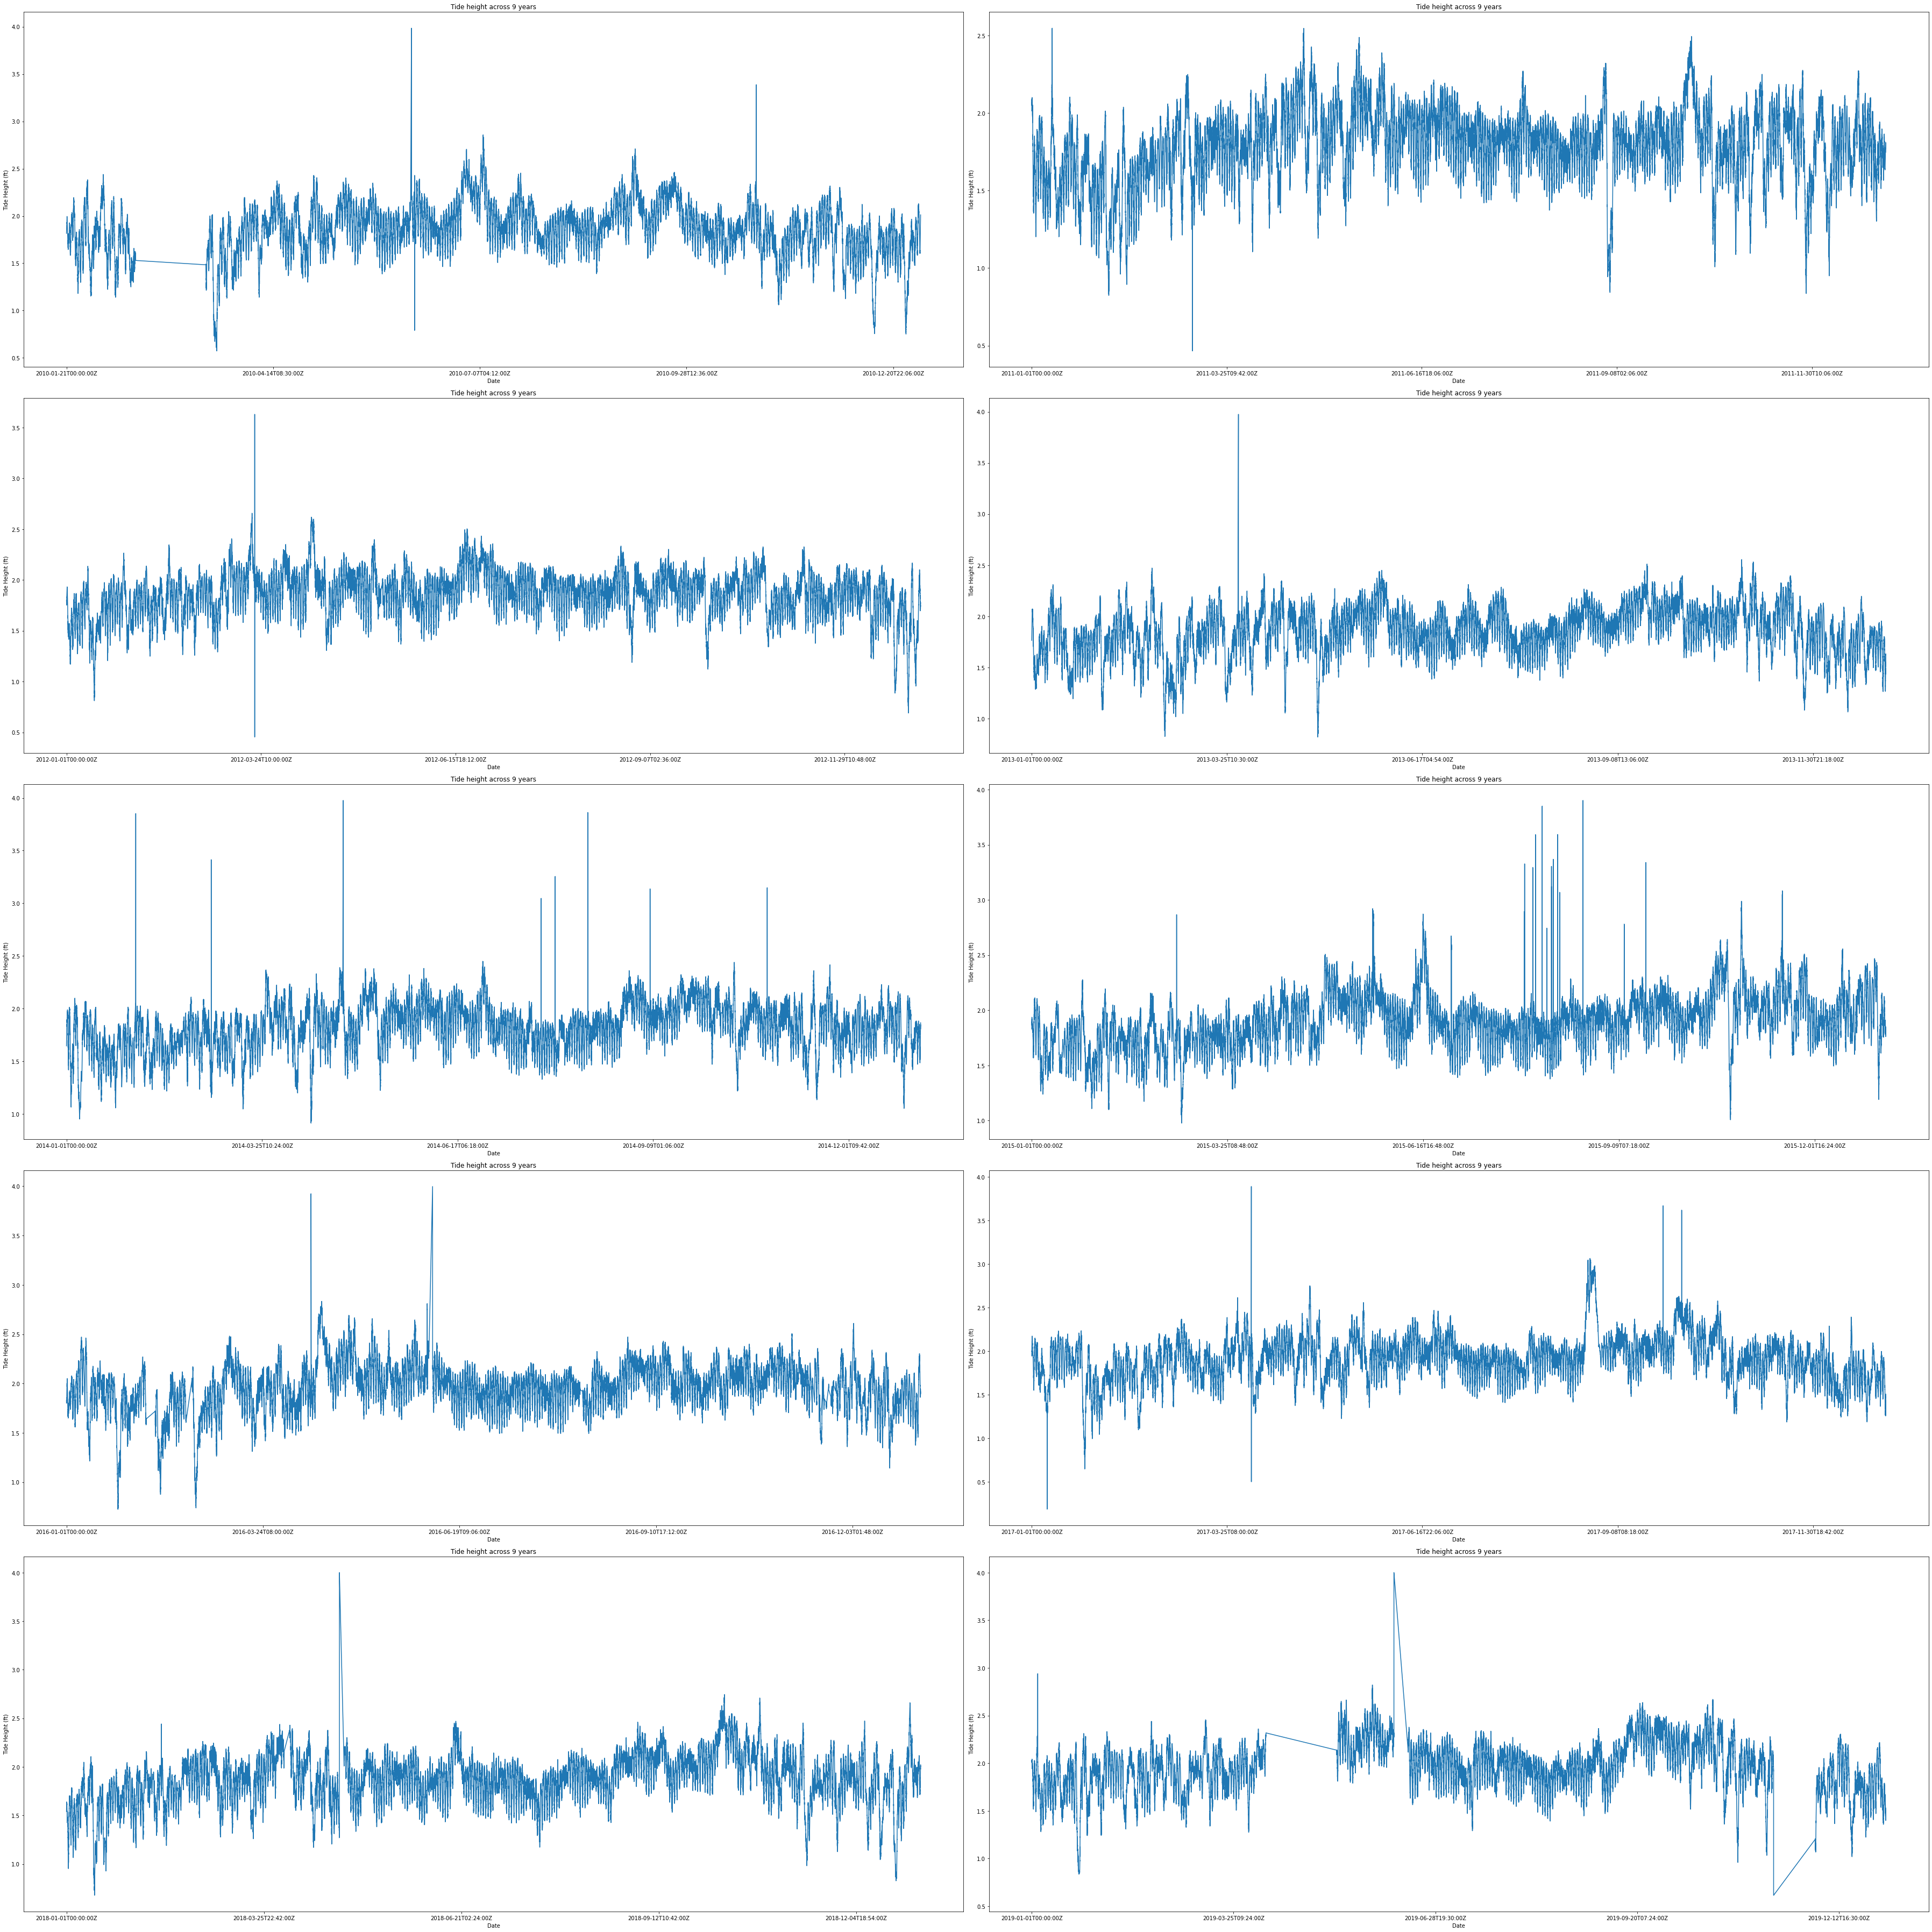

In [260]:
import warnings     
warnings.filterwarnings('ignore')

fig, axs = plt.subplots(5,2, figsize=(50,50))

#write function to  plot tide height
def plot_tide_height(df, ax):
    df['TideHeight'].plot(ax=ax)
    ax.set_title('Tide height across 9 years')
    ax.set_xlabel('Date')
    ax.set_ylabel('Tide Height (ft)')
    return ax

#for loop
for i in range(5):
    for j in range(2):
        ax = axs[i,j]
        if i == 0 and j == 0:
            plot_tide_height(df1noExtremes, ax)
        elif i == 0 and j == 1:
            plot_tide_height(df2noExtremes, ax)
        elif i == 1 and j == 0:
            plot_tide_height(df3noExtremes, ax)
        elif i == 1 and j == 1:
            plot_tide_height(df4noExtremes, ax)
        elif i == 2 and j == 0:
            plot_tide_height(df5noExtremes, ax)
        elif i == 2 and j == 1:
            plot_tide_height(df6noExtremes, ax)
        elif i == 3 and j == 0:
            plot_tide_height(df7noExtremes, ax)
        elif i == 3 and j == 1:
            plot_tide_height(df8noExtremes, ax)
        elif i == 4 and j == 0:
            plot_tide_height(df9noExtremes, ax)
        elif i == 4 and j == 1:
            plot_tide_height(df10noExtremes, ax)

plt.tight_layout()
plt.savefig('Morgan/ProcessedTideHeight.png', facecolor='w', edgecolor='w')
plt.show()


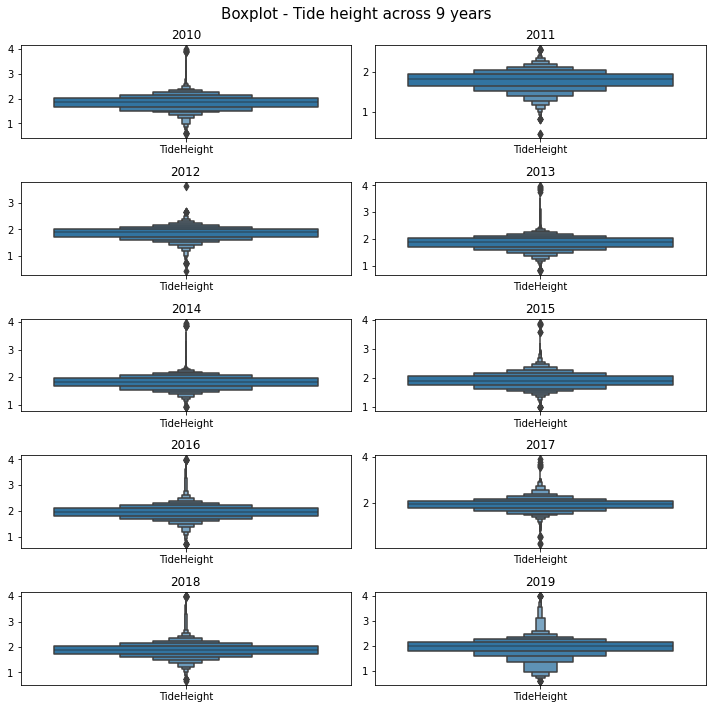

In [261]:
import seaborn as sns

fig,axes = plt.subplots(5,2, figsize=(10,10))
fig.suptitle('Boxplot - Tide height across 9 years', fontsize=15)

sns.boxenplot(data=df1noExtremes, ax=axes[0,0])
axes[0,0].set_title('2010')

sns.boxenplot(data=df2noExtremes, ax=axes[0,1])
axes[0,1].set_title('2011')

sns.boxenplot(data=df3noExtremes, ax=axes[1,0])
axes[1,0].set_title('2012')

sns.boxenplot(data=df4noExtremes, ax=axes[1,1])
axes[1,1].set_title('2013')

sns.boxenplot(data=df5noExtremes, ax=axes[2,0])
axes[2,0].set_title('2014')

sns.boxenplot(data=df6noExtremes, ax=axes[2,1])
axes[2,1].set_title('2015')

sns.boxenplot(data=df7noExtremes, ax=axes[3,0])
axes[3,0].set_title('2016')

sns.boxenplot(data=df8noExtremes, ax=axes[3,1])
axes[3,1].set_title('2017')

sns.boxenplot(data=df9noExtremes, ax=axes[4,0])
axes[4,0].set_title('2018')

sns.boxenplot(data=df10noExtremes, ax=axes[4,1])
axes[4,1].set_title('2019')


plt.tight_layout()
plt.savefig('Morgan/ProcessedTideHeightBoxPlot.png', facecolor='w', edgecolor='w')
plt.show()




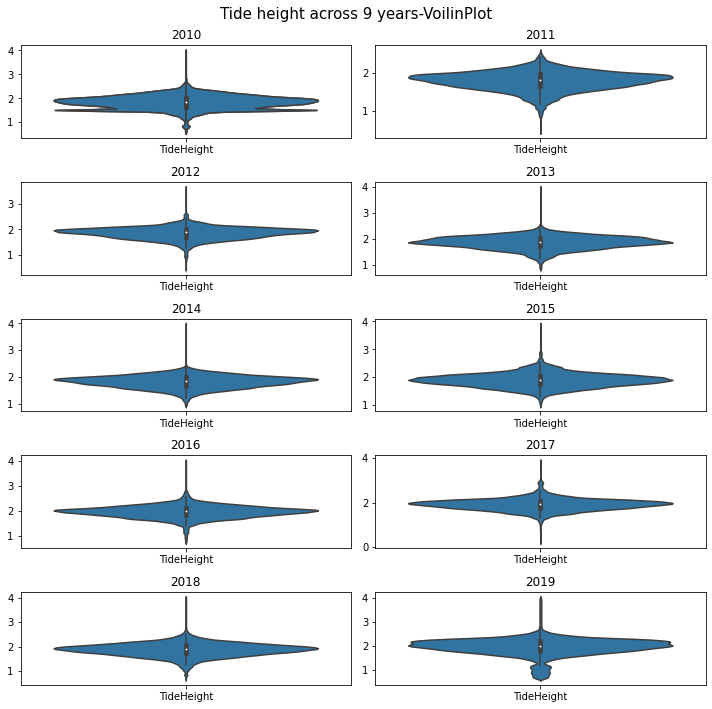

In [262]:
import seaborn as sns

fig,axes = plt.subplots(5,2, figsize=(10,10))
fig.suptitle('Tide height across 9 years-VoilinPlot', fontsize=15)

#voilin plot
sns.violinplot(data=df1noExtremes, ax=axes[0,0])
axes[0,0].set_title('2010')

sns.violinplot(data=df2noExtremes, ax=axes[0,1])
axes[0,1].set_title('2011')

sns.violinplot(data=df3noExtremes, ax=axes[1,0])
axes[1,0].set_title('2012')

sns.violinplot(data=df4noExtremes, ax=axes[1,1])
axes[1,1].set_title('2013')

sns.violinplot(data=df5noExtremes, ax=axes[2,0])
axes[2,0].set_title('2014')

sns.violinplot(data=df6noExtremes, ax=axes[2,1])
axes[2,1].set_title('2015')

sns.violinplot(data=df7noExtremes, ax=axes[3,0])
axes[3,0].set_title('2016')

sns.violinplot(data=df8noExtremes, ax=axes[3,1])
axes[3,1].set_title('2017')

sns.violinplot(data=df9noExtremes, ax=axes[4,0])
axes[4,0].set_title('2018')

sns.violinplot(data=df10noExtremes, ax=axes[4,1])
axes[4,1].set_title('2019')

sns.violinplot(data=df1noExtremes, ax=axes[0,0])
axes[0,0].set_title('2010')

#tight layout
plt.tight_layout()
plt.savefig('Morgan/ProcessedTideHeightViolinPlot.png', facecolor='w', edgecolor='w')
plt.show()


In [263]:
#take mean of tide height for each year
df1mean = df1noExtremes['TideHeight'].mean()
df2mean = df2noExtremes['TideHeight'].mean()
df3mean = df3noExtremes['TideHeight'].mean()
df4mean = df4noExtremes['TideHeight'].mean()
df5mean = df5noExtremes['TideHeight'].mean()
df6mean = df6noExtremes['TideHeight'].mean()
df7mean = df7noExtremes['TideHeight'].mean()
df8mean = df8noExtremes['TideHeight'].mean()
df9mean = df9noExtremes['TideHeight'].mean()
df10mean = df10noExtremes['TideHeight'].mean()

print("Average  tide height for each year, after removing extreme values")
#print all the mean values
print(df1mean, "-Average tide height for the year 2010")
print(df2mean, "-Average tide height for the year 2011")
print(df3mean, "-Average tide height for the year 2012")
print(df4mean, "-Average tide height for the year 2013")
print(df5mean, "-Average tide height for the year 2014")
print(df6mean, "-Average tide height for the year 2015")
print(df7mean, "-Average tide height for the year 2016")
print(df8mean, "-Average tide height for the year 2017")
print(df9mean, "-Average tide height for the year 2018")
print(df10mean, "-Average tide height for the year 2019")


Average  tide height for each year, after removing extreme values
1.8368027341301105 -Average tide height for the year 2010
1.7895250345402436 -Average tide height for the year 2011
1.8634491174125953 -Average tide height for the year 2012
1.857467540426567 -Average tide height for the year 2013
1.8237280512012173 -Average tide height for the year 2014
1.8996608680706741 -Average tide height for the year 2015
1.9625750111900082 -Average tide height for the year 2016
1.916235868146821 -Average tide height for the year 2017
1.8850167636112982 -Average tide height for the year 2018
1.952867718497653 -Average tide height for the year 2019


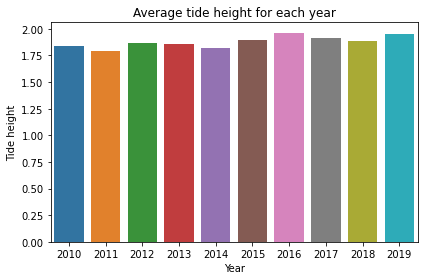

In [264]:
#plot the average tide height for each year using seaborn

import seaborn as sns

sns.barplot(x=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'], y=[df1mean,df2mean,df3mean,df4mean,df5mean,df6mean,df7mean,df8mean,df9mean,df10mean])
plt.title('Average tide height for each year')
plt.xlabel('Year')
plt.ylabel('Tide height')

plt.tight_layout()
plt.savefig('Morgan/ProcessedTideHeightBarPlotPerYear.png', facecolor='w', edgecolor='w')
plt.show()

## Taking a window of 25 days for further analysis and plotting

In [265]:
fperiodical = df.rolling(6000).mean() 
dfperiodical = df.iloc[::6000, :]
dfperiodical

,TideHeight,Date,Time
DateWTime,,,
2010-01-21T00:00:00Z,1.816000,2010-01-21,00:00
2010-02-15T00:00:00Z,1.768000,2010-02-15,00:00
2010-03-12T00:00:00Z,1.494043,2010-03-12,00:00
2010-04-06T00:00:00Z,2.077000,2010-04-06,00:00
2010-05-01T00:00:00Z,2.239000,2010-05-01,00:00
...,...,...,...
2019-09-16T00:00:00Z,2.278000,2019-09-16,00:00
2019-10-11T00:00:00Z,2.281000,2019-10-11,00:00
2019-11-05T00:00:00Z,1.888000,2019-11-05,00:00


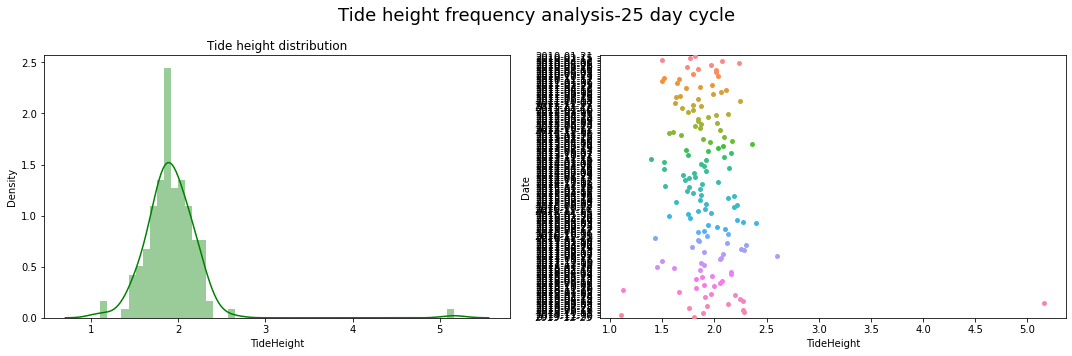

In [266]:
#plot a histogram of the tide height
import seaborn 
#subplots
fig,axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Tide height frequency analysis-25 day cycle', fontsize=18)

#dfperiodical['TideHeight'].plot(ax=axes[1], kind='hist', bins=50)

seaborn.distplot(dfperiodical['TideHeight'], bins=50, ax=axes[0], color='green')
#give title
axes[0].set_title('Tide height distribution')

seaborn.swarmplot(x='TideHeight', y='Date', data=dfperiodical, ax=axes[1])

#tight layout
plt.tight_layout()
plt.savefig('Morgan/processedTideHeightFrequencyAnalysis.png', facecolor='w', edgecolor='w')
plt.show()


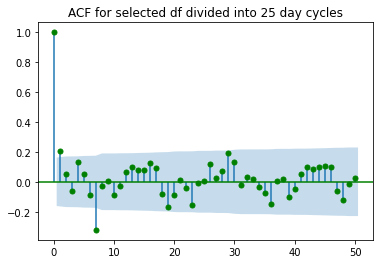

In [267]:
import pandas as pd 
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = dfperiodical['TideHeight']
plot_acf(data, lags=50 , color = 'green')
plt.title('ACF for selected df divided into 25 day cycles')
plt.savefig('Morgan/ACF for selected df', facecolor='w', edgecolor='w')
plt.show()


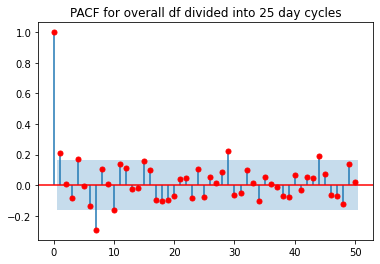

In [268]:
plot_pacf(data, lags=50, color = 'red')
plt.title('PACF for overall df divided into 25 day cycles')
plt.savefig('Morgan/PACF for selected df', facecolor='w', edgecolor='w')
plt.show()

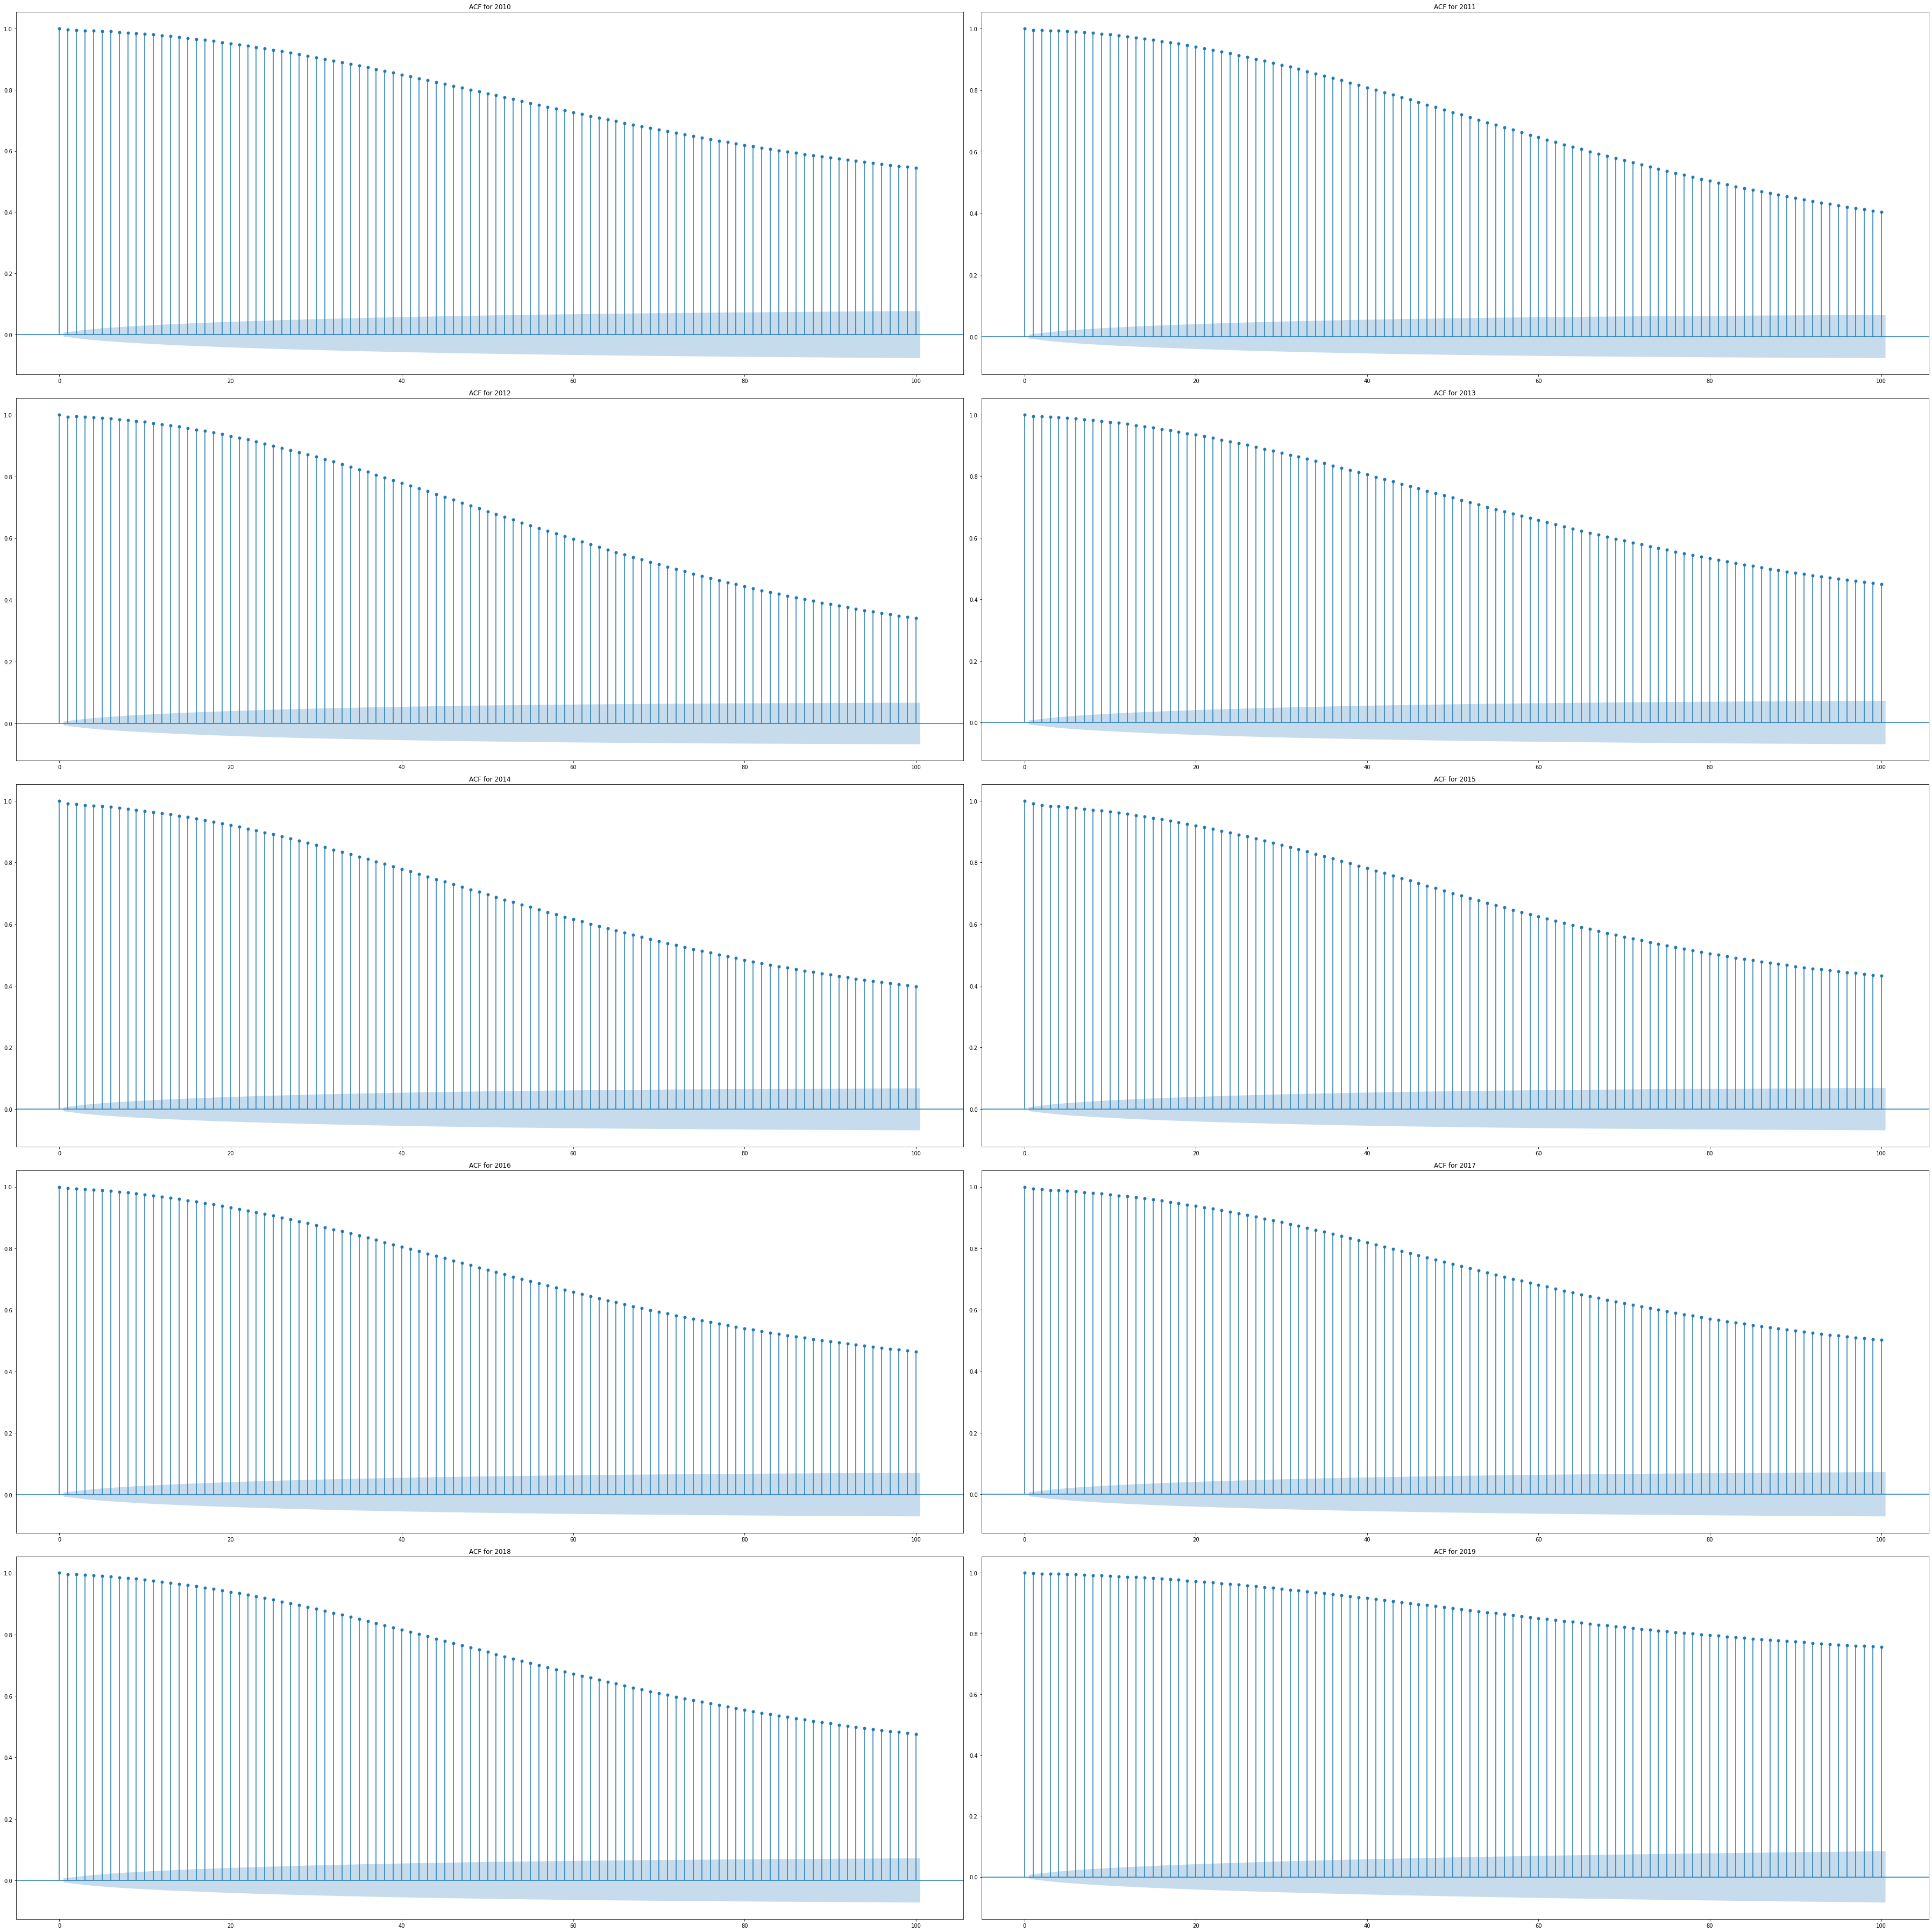

In [269]:
import pandas as pd 
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
#create subplots
fig, axes = plt.subplots(5,2, figsize=(50,50))


data = df1noExtremes['TideHeight']
plot_acf(data, lags=100,ax=axes[0,0])
axes[0,0].set_title('ACF for 2010')

data=df2noExtremes['TideHeight']
plot_acf(data, lags=100,ax=axes[0,1])
axes[0,1].set_title('ACF for 2011') 

data=df3noExtremes['TideHeight']
plot_acf(data, lags=100,ax=axes[1,0])
axes[1,0].set_title('ACF for 2012')

data=df4noExtremes['TideHeight']
plot_acf(data, lags=100,ax=axes[1,1])
axes[1,1].set_title('ACF for 2013')

data=df5noExtremes['TideHeight']
plot_acf(data, lags=100,ax=axes[2,0])
axes[2,0].set_title('ACF for 2014')

data=df6noExtremes['TideHeight']
plot_acf(data, lags=100,ax=axes[2,1])
axes[2,1].set_title('ACF for 2015')

data=df7noExtremes['TideHeight']
plot_acf(data, lags=100,ax=axes[3,0])
axes[3,0].set_title('ACF for 2016')

data=df8noExtremes['TideHeight']
plot_acf(data, lags=100,ax=axes[3,1])
axes[3,1].set_title('ACF for 2017')

data=df9noExtremes['TideHeight']
plot_acf(data, lags=100,ax=axes[4,0])
axes[4,0].set_title('ACF for 2018')

data=df10noExtremes['TideHeight']
plot_acf(data, lags=100,ax=axes[4,1])
axes[4,1].set_title('ACF for 2019')

plt.tight_layout()
plt.savefig('Morgan/processedTideHeightACF.png', facecolor='w', edgecolor='w')
plt.show()


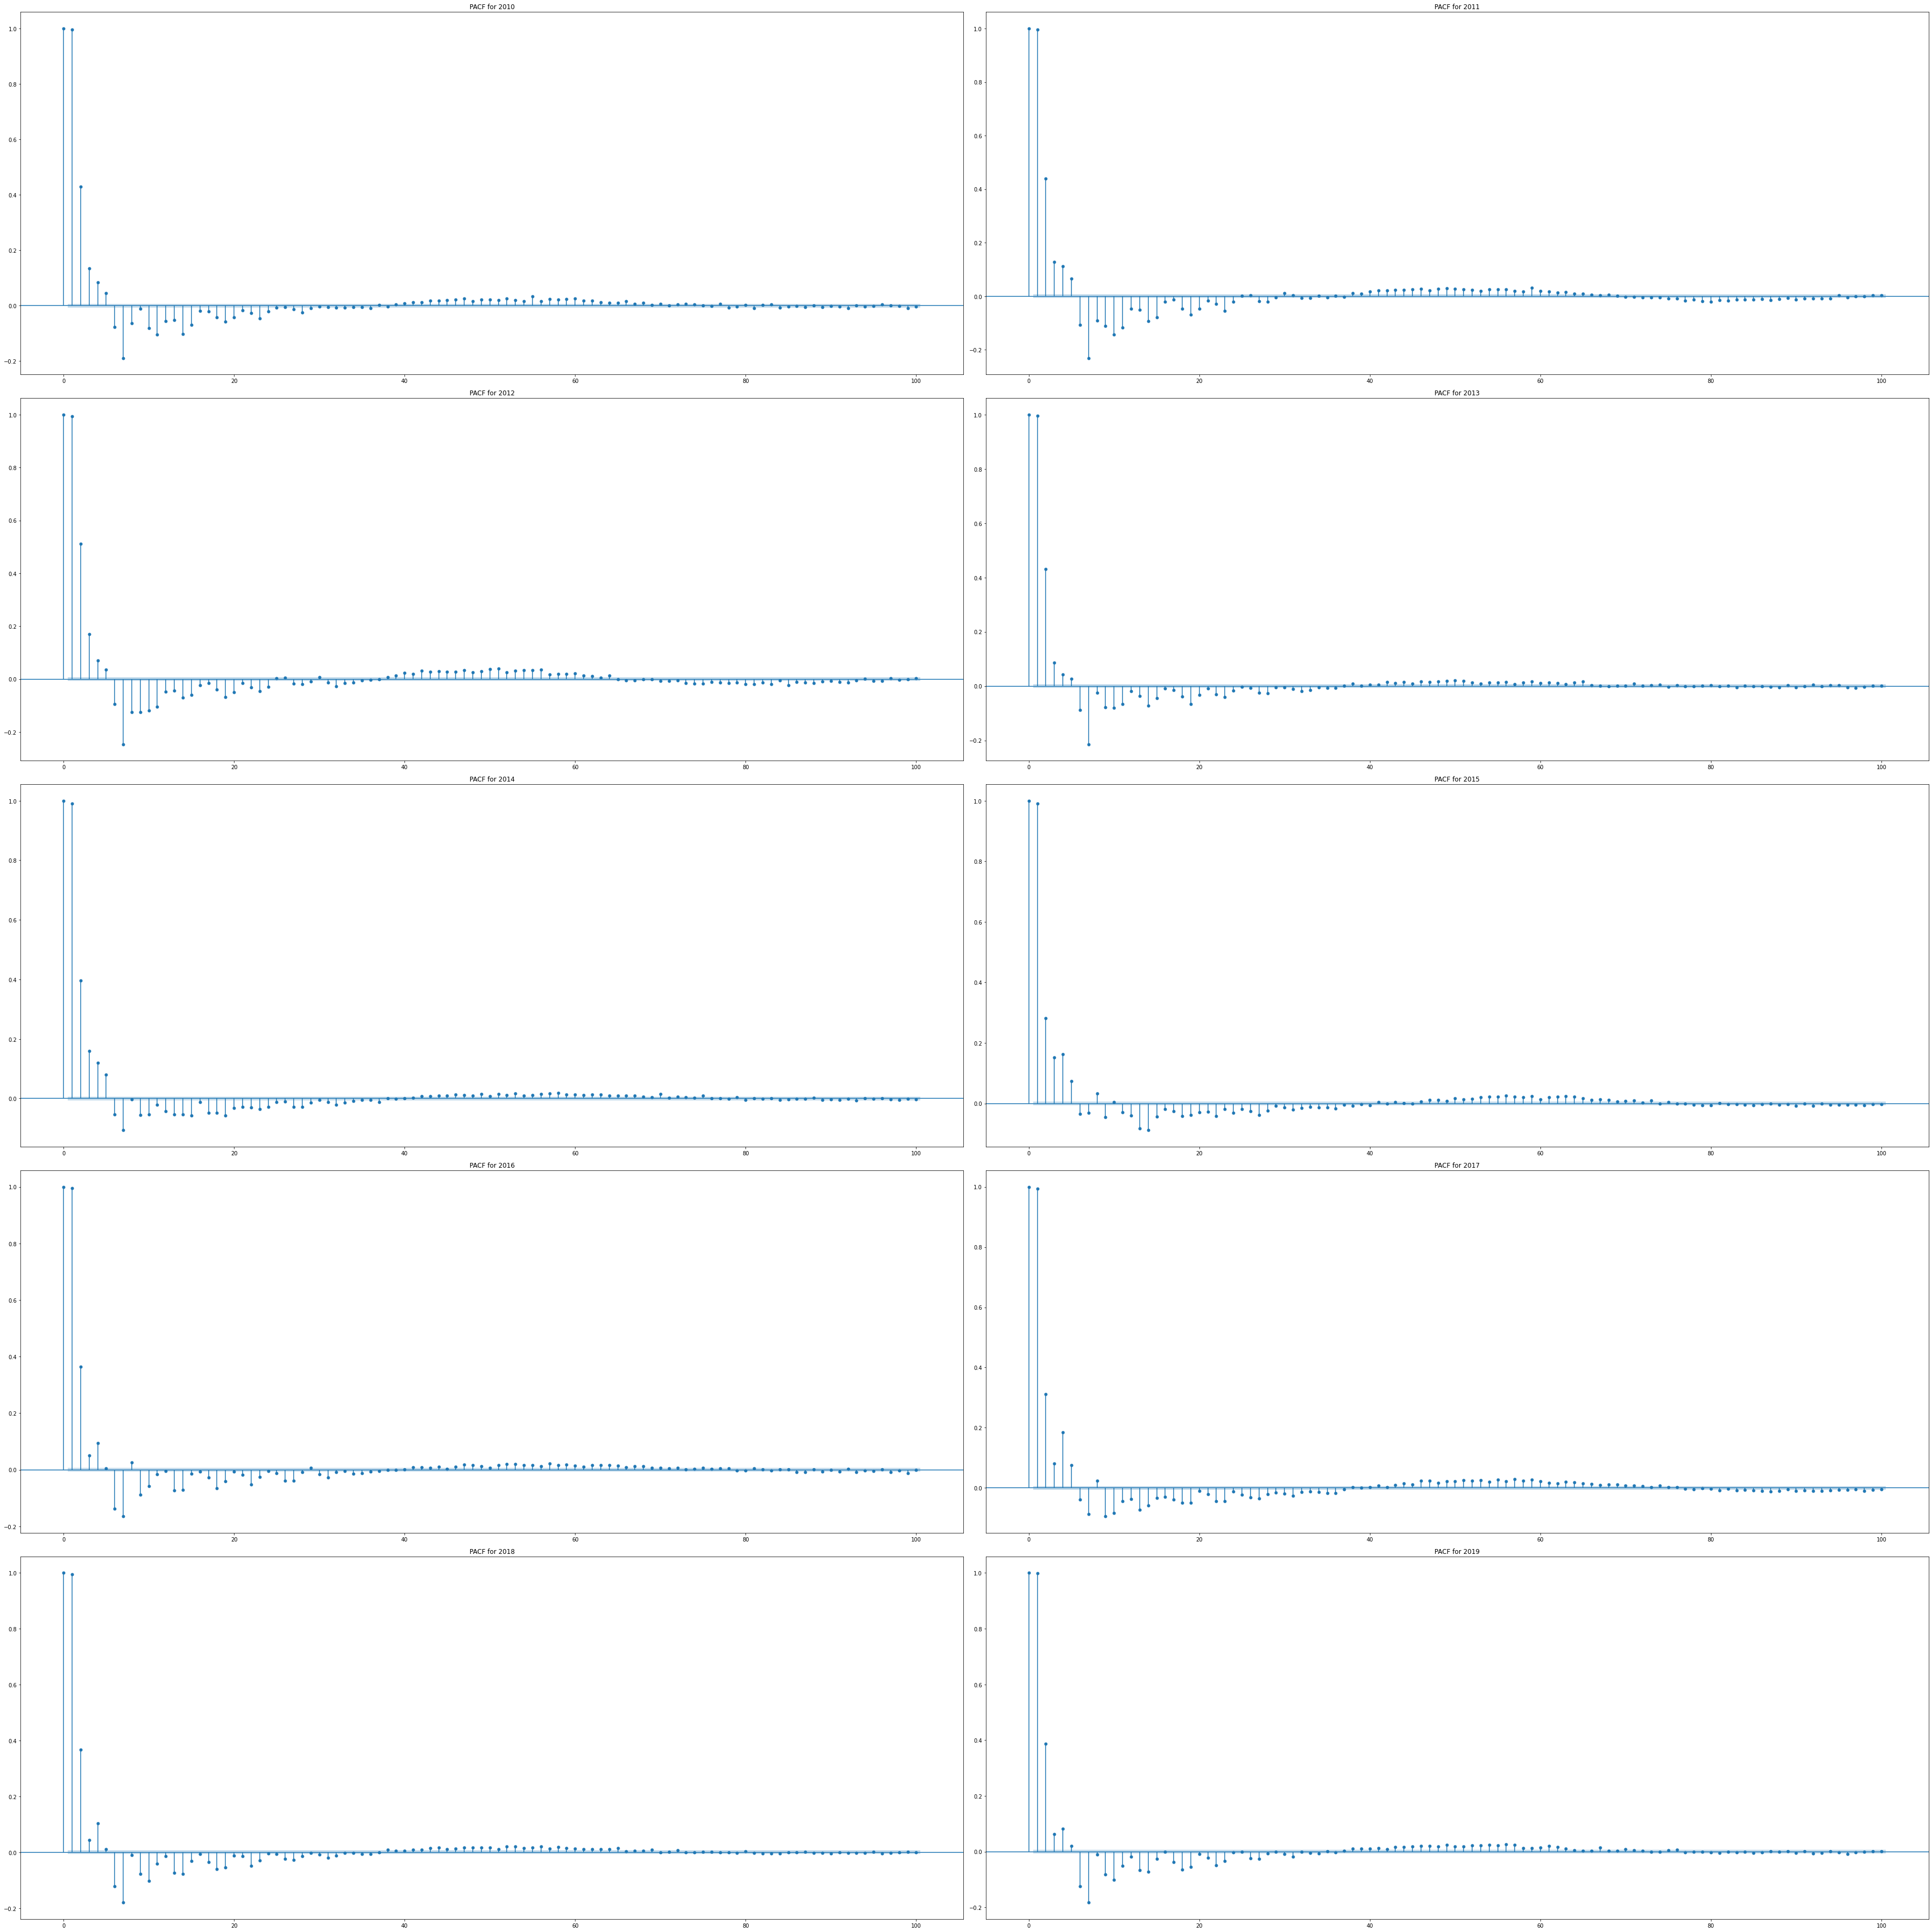

In [270]:
import pandas as pd 
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
#create subplots
fig, axes = plt.subplots(5,2, figsize=(50,50))


data = df1noExtremes['TideHeight']
plot_pacf(data, lags=100,ax=axes[0,0])
axes[0,0].set_title('PACF for 2010')

data=df2noExtremes['TideHeight']
plot_pacf(data, lags=100,ax=axes[0,1])
axes[0,1].set_title('PACF for 2011')

data=df3noExtremes['TideHeight']
plot_pacf(data, lags=100,ax=axes[1,0])
axes[1,0].set_title('PACF for 2012')

data=df4noExtremes['TideHeight']
plot_pacf(data, lags=100,ax=axes[1,1])
axes[1,1].set_title('PACF for 2013')

data=df5noExtremes['TideHeight']
plot_pacf(data, lags=100,ax=axes[2,0])
axes[2,0].set_title('PACF for 2014')

data=df6noExtremes['TideHeight']
plot_pacf(data, lags=100,ax=axes[2,1])
axes[2,1].set_title('PACF for 2015')

data=df7noExtremes['TideHeight']
plot_pacf(data, lags=100,ax=axes[3,0])
axes[3,0].set_title('PACF for 2016')

data=df8noExtremes['TideHeight']
plot_pacf(data, lags=100,ax=axes[3,1])
axes[3,1].set_title('PACF for 2017')

data=df9noExtremes['TideHeight']
plot_pacf(data, lags=100,ax=axes[4,0])
axes[4,0].set_title('PACF for 2018')

data=df10noExtremes['TideHeight']
plot_pacf(data, lags=100,ax=axes[4,1])
axes[4,1].set_title('PACF for 2019')

plt.tight_layout()
plt.savefig('Morgan/processedTideHeightPACF.png', facecolor='w', edgecolor='w')
plt.show()


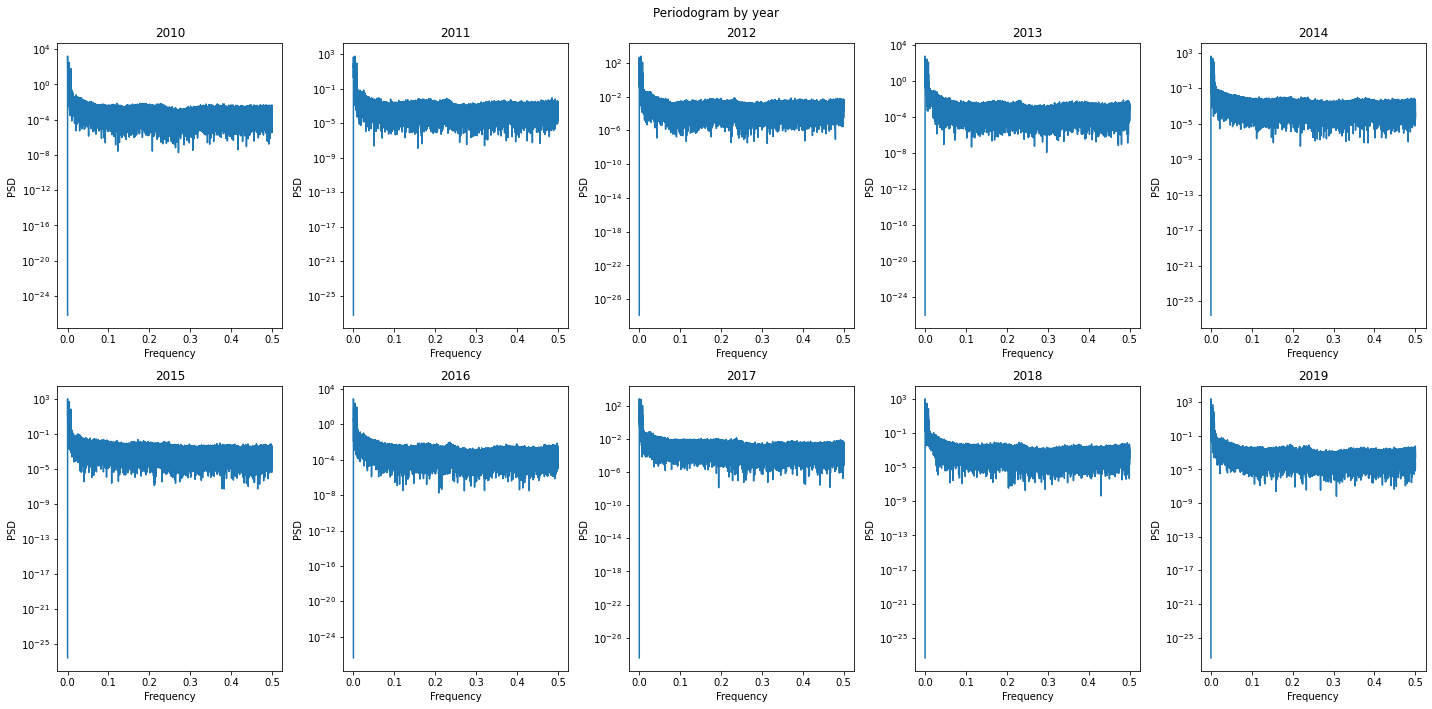

<Figure size 432x288 with 0 Axes>

In [271]:

from scipy import signal
fig, axes = plt.subplots(2,5, figsize=(20,10))
fig.suptitle('Periodogram by year')
def periodogram(data,ax):
    f, Pxx_den = signal.periodogram(data, fs=1)
    ax.semilogy(f, Pxx_den)
    #set y-axis label
    ax.set_ylabel('PSD')
    #set x-axis label
    ax.set_xlabel('Frequency')
    
periodogram(df1noExtremes['TideHeight'],axes[0,0])
axes[0,0].set_title('2010')
periodogram(df2noExtremes['TideHeight'],axes[0,1])
axes[0,1].set_title('2011')
periodogram(df3noExtremes['TideHeight'],axes[0,2])
axes[0,2].set_title('2012')
periodogram(df4noExtremes['TideHeight'],axes[0,3])
axes[0,3].set_title('2013')
periodogram(df5noExtremes['TideHeight'],axes[0,4])
axes[0,4].set_title('2014')
periodogram(df6noExtremes['TideHeight'],axes[1,0])
axes[1,0].set_title('2015')
periodogram(df7noExtremes['TideHeight'],axes[1,1])
axes[1,1].set_title('2016')
periodogram(df8noExtremes['TideHeight'],axes[1,2])
axes[1,2].set_title('2017')
periodogram(df9noExtremes['TideHeight'],axes[1,3])
axes[1,3].set_title('2018')
periodogram(df10noExtremes['TideHeight'],axes[1,4])
axes[1,4].set_title('2019')

plt.tight_layout()
plt.show()
plt.savefig('Morgan/MorganprocessedTideHeightPeriodogram.png', facecolor='w', edgecolor='w')

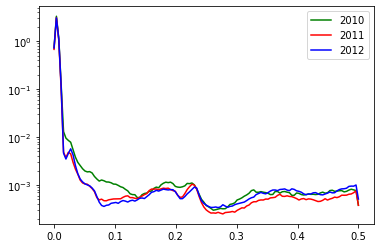

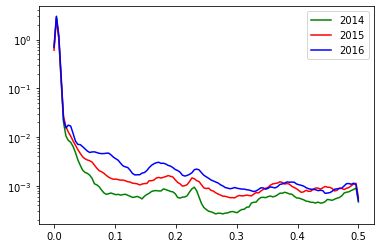

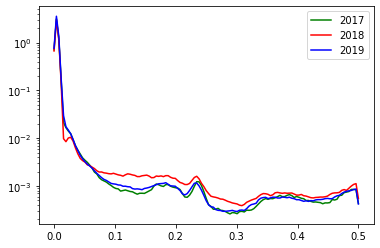

In [278]:

from scipy import signal
import matplotlib.pyplot as plt

x = df1noExtremes['TideHeight']
f, Pxx_den = signal.welch(x, fs=1)
plt.semilogy(f, Pxx_den, color = 'green')

x = df2noExtremes['TideHeight']
f, Pxx_den = signal.welch(x, fs=1)
plt.semilogy(f, Pxx_den, color = 'red')

x = df3noExtremes['TideHeight']
f, Pxx_den = signal.welch(x, fs=1)
plt.semilogy(f, Pxx_den , color = 'blue')

#legend
plt.legend(['2010','2011','2012'])
plt.savefig('Morgan/Welchstyle-2010-2012', facecolor='w', edgecolor='w')
plt.show()

x = df4noExtremes['TideHeight']
f, Pxx_den = signal.welch(x, fs=1)
plt.semilogy(f, Pxx_den, color = 'green')

x = df5noExtremes['TideHeight']
f, Pxx_den = signal.welch(x, fs=1)
plt.semilogy(f, Pxx_den, color = 'red')

x = df6noExtremes['TideHeight']
f, Pxx_den = signal.welch(x, fs=1)
plt.semilogy(f, Pxx_den, color = 'blue')

plt.legend(['2014','2015','2016'])
plt.savefig('Morgan/Welchstyle-2013-2015', facecolor='w', edgecolor='w')
plt.show()


x = df7noExtremes['TideHeight']
f, Pxx_den = signal.welch(x, fs=1)
plt.semilogy(f, Pxx_den, color = 'green')

x = df8noExtremes['TideHeight']
f, Pxx_den = signal.welch(x, fs=1)  
plt.semilogy(f, Pxx_den, color = 'red')

x = df9noExtremes['TideHeight']
f, Pxx_den = signal.welch(x, fs=1)
plt.semilogy(f, Pxx_den, color = 'blue')

plt.legend(['2017','2018','2019'])
plt.savefig('Morgan/Welchstyle2016-2019.png', facecolor='w', edgecolor='w')
plt.show()

****
INFERENTIAL ANALYSIS
****

**Based on the plot of subtracted rows from each year, I made some conclusions and described them in the report**


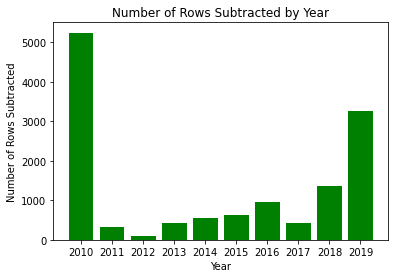

In [279]:
def subtractRows(df):
    return 87900-df.shape[0]

#plot bar plot of subtracted rows
import matplotlib.pyplot as plt

plt.bar(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'],
            [subtractRows(df1noExtremes),subtractRows(df2noExtremes),subtractRows(df3noExtremes),
                subtractRows(df4noExtremes),subtractRows(df5noExtremes),subtractRows(df6noExtremes),
                subtractRows(df7noExtremes),subtractRows(df8noExtremes),subtractRows(df9noExtremes),
                subtractRows(df10noExtremes)], color='green')
plt.xlabel('Year')
plt.ylabel('Number of Rows Subtracted')
plt.title('Number of Rows Subtracted by Year')

plt.savefig('Morgan/VolatalityAnalysis.png', facecolor='w', edgecolor='w')
plt.show()

In [280]:
import os
print('Number of plots saved: ', len(os.listdir('Morgan/')))

Number of plots saved:  19
